# Pandas Expanding and Rolling
* 튜토리얼 영상 : https://youtu.be/Sq_uhK_GFIQ

* https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.expanding.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html

* 차이점은 rolling은 윈도우가 이동하며 해당 구간의 평균이나 합을 구하지만 expanding은 누적해서 값을 더하거나 평균을 구함

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
s = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2015', periods=1000))

<AxesSubplot:>

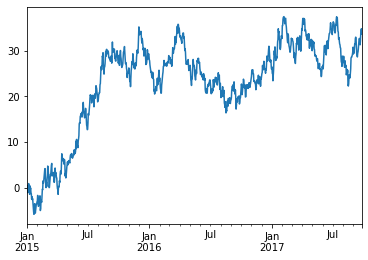

In [3]:
s = s.cumsum()
s.plot()

In [4]:
r = s.rolling(window=30) #window : 계산하는 데이터갯수, 즉 30일치만큼 계산 
r.mean()

2015-01-01          NaN
2015-01-02          NaN
2015-01-03          NaN
2015-01-04          NaN
2015-01-05          NaN
                ...    
2017-09-22    30.364127
2017-09-23    30.619082
2017-09-24    30.825418
2017-09-25    31.032324
2017-09-26    31.203087
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

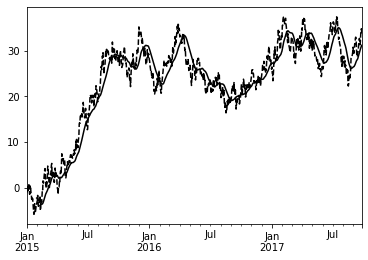

In [5]:
# 이동평균 
s.plot(style='k--')
r.mean().plot(style='k')

In [30]:
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=pd.date_range('1/1/2015', periods=1000),
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df

,A,B,C,D
2015-01-01,0.654589,0.121538,1.682315,0.457173
2015-01-02,0.135242,0.940699,0.498160,1.379929
2015-01-03,0.679641,0.775835,-0.843836,0.823634
2015-01-04,0.737448,0.790065,1.725456,-1.427185
2015-01-05,1.301473,1.526093,2.680578,-1.933863
...,...,...,...,...
2017-09-22,-14.795770,-12.995779,8.644132,-31.415937
2017-09-23,-13.728841,-13.836811,9.421460,-30.414989
2017-09-24,-14.060644,-12.725210,9.888445,-30.225549
2017-09-25,-13.692377,-11.572560,9.700582,-29.563261


In [31]:
df.rolling(window=60).sum()

,A,B,C,D
2015-01-01,NaN,NaN,NaN,NaN
2015-01-02,NaN,NaN,NaN,NaN
2015-01-03,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2017-09-22,-1007.488179,-457.135412,425.395852,-1525.942579
2017-09-23,-1006.133257,-463.894920,424.052908,-1533.135044
2017-09-24,-1003.696861,-470.339664,422.658619,-1540.237499
2017-09-25,-1001.119726,-475.772623,421.047268,-1546.254508


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

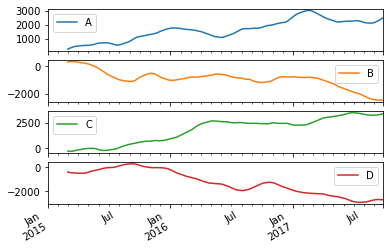

In [7]:
df.rolling(window=60).sum().plot(subplots=True)

In [32]:
len(df)

1000

<AxesSubplot:>

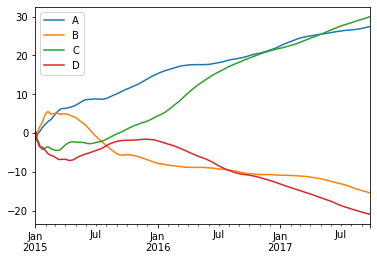

In [8]:
df.rolling(window=len(df), min_periods=1).mean().plot()

<AxesSubplot:>

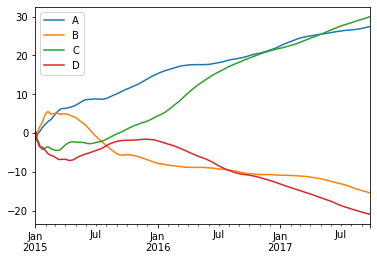

In [9]:
df.expanding(min_periods=1).mean().plot()

In [10]:
df.expanding?

<AxesSubplot:>

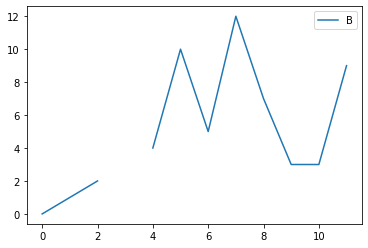

In [25]:
dfe = pd.DataFrame({'B': [0, 1, 2, np.nan, 4,10,5,12,7,3,3,9]})
dfe.plot()

In [26]:
dfe

,B
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0
5,10.0
6,5.0
7,12.0
8,7.0
9,3.0


In [28]:
dfe.rolling(window=2).sum()

,B
0,NaN
1,1.0
2,3.0
3,NaN
4,NaN
5,14.0
6,15.0
7,17.0
8,19.0
9,10.0


In [19]:
dfe.expanding(2).sum()

,B
0,NaN
1,1.0
2,3.0
3,3.0
4,7.0


<AxesSubplot:>

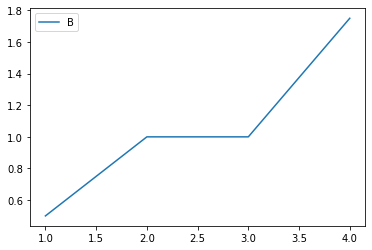

In [13]:
dfe.expanding(2).mean().plot()

In [29]:
import pandas as pd

df = pd.DataFrame({

    'size': range(1, 10),

    'data': [4, 1, 2, np.nan, 4, 5, np.nan, 7, 8]})

df["expanding(sum)win2"] = df["data"].expanding(2).sum()

df["expanding(sum)win3"] = df["data"].expanding(3).sum()

df["expanding(sum)win4"] = df["data"].expanding(4).sum()

df["cumsum"] = df["data"].cumsum()

df["expanding(sum)/size"] = df["expanding(sum)win2"] / df["size"]

df["Mean"] = df["data"].expanding(2).mean()

df

,size,data,expanding(sum)win2,expanding(sum)win3,expanding(sum)win4,cumsum,expanding(sum)/size,Mean
0,1,4.0,NaN,NaN,NaN,4.0,NaN,NaN
1,2,1.0,5.0,NaN,NaN,5.0,2.500000,2.500000
2,3,2.0,7.0,7.0,NaN,7.0,2.333333,2.333333
3,4,NaN,7.0,7.0,NaN,NaN,1.750000,2.333333
4,5,4.0,11.0,11.0,11.0,11.0,2.200000,2.750000
5,6,5.0,16.0,16.0,16.0,16.0,2.666667,3.200000
6,7,NaN,16.0,16.0,16.0,NaN,2.285714,3.200000
7,8,7.0,23.0,23.0,23.0,23.0,2.875000,3.833333
8,9,8.0,31.0,31.0,31.0,31.0,3.444444,4.428571
